In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\Coordcontrol4_P2_7_18_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\video_time\control4_P2_7_18_24_video_time0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\stimulus_time\control4_P2_7_18_24_stimulus_time0.csv'

north_pixel = 95
south_pixel = 414
east_pixel = 486
west_pixel = 146
shelter_x_pixel = 326
shelter_y_pixel = 385

#estimate for when mouse reaches shelter
escape_done = 3 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
timestamp_df = convert_time(time_path, coord_scaled, audio_path, 1)

In [8]:
coord_scaled.tail()

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set
11430,11430,11430,19.437497,-5.885317,0.999939,18.307118,-5.080575,0.999997,18.618466,-4.323656,...,15.625008,-4.323283,0.999977,14.110466,-3.784428,0.999988,12.606764,-2.902740,0.999985,77.186458
11431,11431,11431,18.173440,-6.476626,0.998820,17.564750,-5.540433,0.999987,17.985914,-4.999229,...,15.406805,-4.323283,0.999958,14.092491,-3.711812,0.999973,12.561671,-2.607634,0.999991,77.226406
11432,11432,11432,17.176930,-6.838241,0.864686,17.001811,-6.024763,0.999783,17.649315,-5.650902,...,15.336256,-4.371307,0.999955,14.092491,-3.711812,0.999952,12.535833,-2.586480,0.999991,77.268122
11433,11433,11433,17.117918,-7.084692,0.895531,16.834045,-6.259432,0.999559,17.562434,-5.925233,...,15.281920,-4.511771,0.999963,14.079367,-3.711812,0.999946,12.438232,-2.586480,0.999992,77.306509
11434,11434,11434,16.987559,-7.354617,0.980707,16.762358,-6.461135,0.999888,17.513617,-6.091876,...,15.208252,-4.708587,0.999984,14.027456,-3.882860,0.999953,12.436212,-2.586480,0.999994,77.346522


In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
#start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
#end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range, escape_estimate = dataframe_ranges(-7, 14, escape_done,coord_scaled)

In [16]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9501,9501,9501,29.789492,7.656081,0.017255,30.819791,8.442300,0.991893,31.010591,9.256741,...,0.999670,25.632980,10.232648,0.999981,0.012902,31.185692,0.776506,0.035264,1.169057,0.920491
9502,9502,9502,29.797560,7.550912,0.006027,30.829460,8.422062,0.989825,30.994598,9.192543,...,0.999716,25.643640,10.210280,0.999981,0.048435,31.191575,0.322880,0.011473,1.218738,1.398168
9503,9503,9503,29.805629,7.445742,0.007437,30.844478,8.422062,0.985952,31.023102,9.192543,...,0.999711,25.643640,10.210280,0.999983,0.087245,31.191575,0.000000,0.000000,1.271766,1.366332
9504,9504,9504,29.813698,7.340573,0.023238,30.844478,8.430781,0.995097,31.023102,9.249522,...,0.999801,25.632980,10.178336,0.999989,0.127347,31.164028,0.800352,0.032096,1.330570,1.466359
9505,9505,9505,29.821767,7.235404,0.016141,30.852691,8.430781,0.993056,31.040048,9.249522,...,0.999765,25.614156,10.207578,0.999983,0.167283,31.152312,1.355228,0.054122,1.376171,1.141859
9506,9506,9506,29.829835,7.130234,0.021044,30.844478,8.430781,0.996408,31.020945,9.250304,...,0.999747,25.463987,10.178581,0.999972,0.207270,31.095164,1.677406,0.067074,1.425426,1.231790
9507,9507,9507,29.837904,7.025065,0.048792,30.847337,8.430781,0.997250,31.020945,9.275135,...,0.999729,25.450096,10.178581,0.999973,0.247309,31.062983,0.938358,0.037571,1.465149,0.992101
9508,9508,9508,29.845973,6.919896,0.065885,30.844276,8.430781,0.997875,31.013203,9.276040,...,0.999721,25.423120,10.178581,0.999966,0.294618,31.062886,0.835987,0.039550,1.504071,0.822709
9509,9509,9509,29.854041,6.814726,0.076836,30.847337,8.437235,0.998128,31.013203,9.280486,...,0.999740,25.396149,10.179124,0.999967,0.327514,31.062886,0.000000,0.000000,1.538407,1.043770
9510,9510,9510,29.862110,6.709557,0.019104,30.847337,8.443602,0.996330,31.013203,9.294317,...,0.999727,25.365981,10.178809,0.999966,0.367194,31.062886,0.000000,0.000000,1.570897,0.818811


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

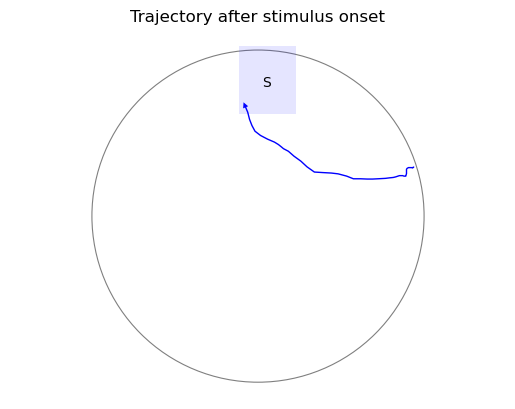

In [17]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

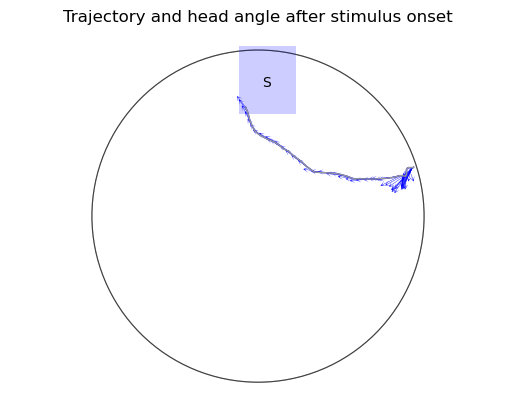

In [18]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

In [19]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9501,9501,9501,29.789492,7.656081,0.017255,30.819791,8.442300,0.991893,31.010591,9.256741,...,0.999670,25.632980,10.232648,0.999981,0.012902,31.185692,0.776506,0.035264,1.169057,0.920491
9502,9502,9502,29.797560,7.550912,0.006027,30.829460,8.422062,0.989825,30.994598,9.192543,...,0.999716,25.643640,10.210280,0.999981,0.048435,31.191575,0.322880,0.011473,1.218738,1.398168
9503,9503,9503,29.805629,7.445742,0.007437,30.844478,8.422062,0.985952,31.023102,9.192543,...,0.999711,25.643640,10.210280,0.999983,0.087245,31.191575,0.000000,0.000000,1.271766,1.366332
9504,9504,9504,29.813698,7.340573,0.023238,30.844478,8.430781,0.995097,31.023102,9.249522,...,0.999801,25.632980,10.178336,0.999989,0.127347,31.164028,0.800352,0.032096,1.330570,1.466359
9505,9505,9505,29.821767,7.235404,0.016141,30.852691,8.430781,0.993056,31.040048,9.249522,...,0.999765,25.614156,10.207578,0.999983,0.167283,31.152312,1.355228,0.054122,1.376171,1.141859
9506,9506,9506,29.829835,7.130234,0.021044,30.844478,8.430781,0.996408,31.020945,9.250304,...,0.999747,25.463987,10.178581,0.999972,0.207270,31.095164,1.677406,0.067074,1.425426,1.231790
9507,9507,9507,29.837904,7.025065,0.048792,30.847337,8.430781,0.997250,31.020945,9.275135,...,0.999729,25.450096,10.178581,0.999973,0.247309,31.062983,0.938358,0.037571,1.465149,0.992101
9508,9508,9508,29.845973,6.919896,0.065885,30.844276,8.430781,0.997875,31.013203,9.276040,...,0.999721,25.423120,10.178581,0.999966,0.294618,31.062886,0.835987,0.039550,1.504071,0.822709
9509,9509,9509,29.854041,6.814726,0.076836,30.847337,8.437235,0.998128,31.013203,9.280486,...,0.999740,25.396149,10.179124,0.999967,0.327514,31.062886,0.000000,0.000000,1.538407,1.043770
9510,9510,9510,29.862110,6.709557,0.019104,30.847337,8.443602,0.996330,31.013203,9.294317,...,0.999727,25.365981,10.178809,0.999966,0.367194,31.062886,0.000000,0.000000,1.570897,0.818811


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

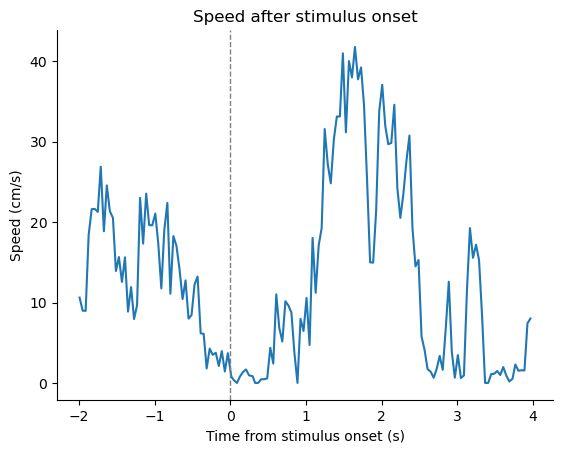

In [20]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

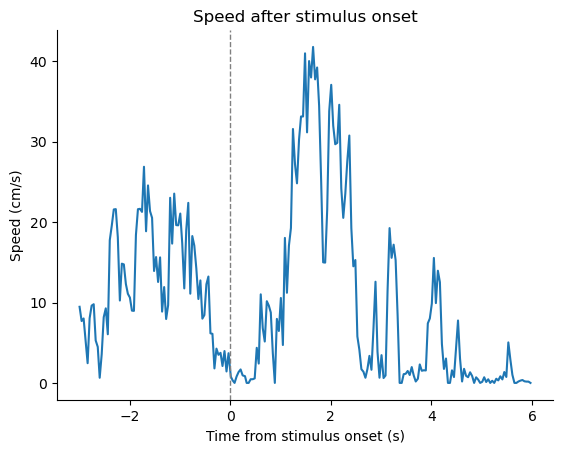

In [21]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

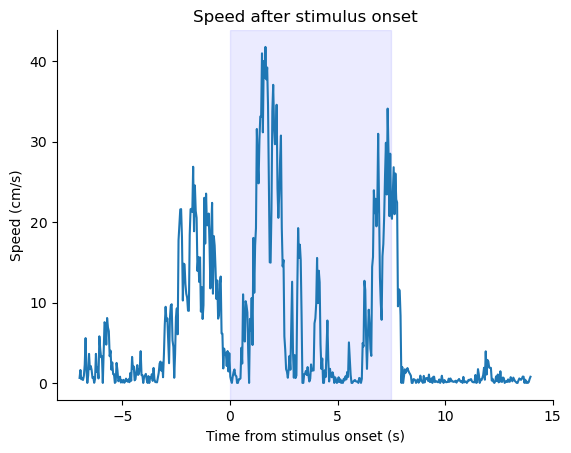

In [22]:
speed_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

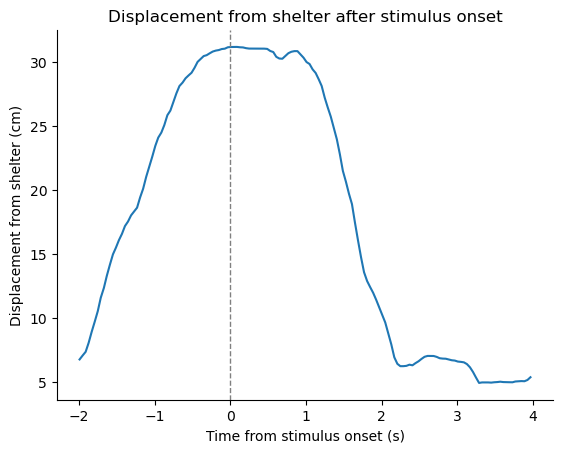

In [23]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

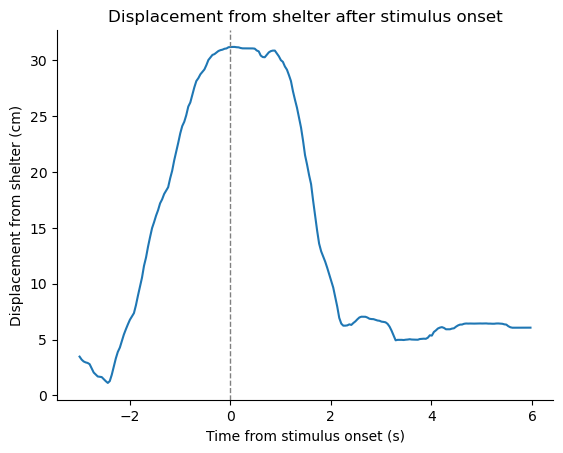

In [24]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

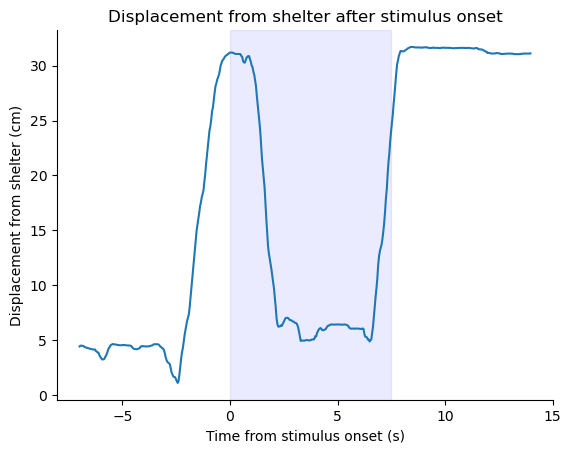

In [25]:
displacement_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

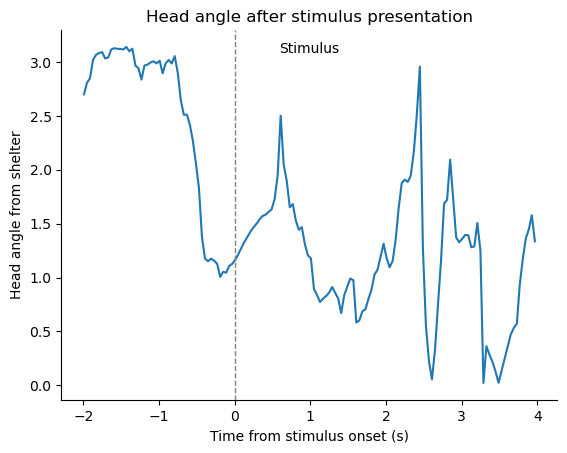

In [26]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

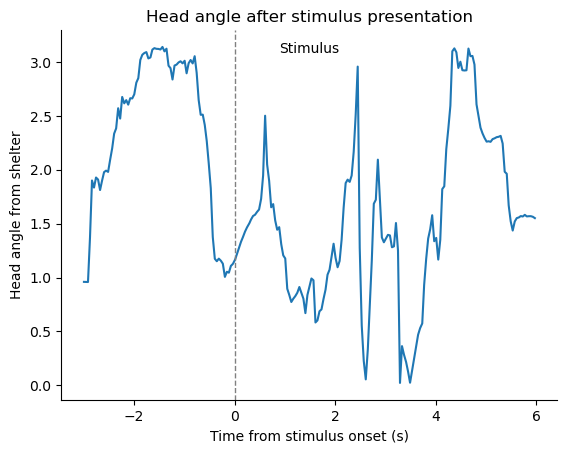

In [27]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

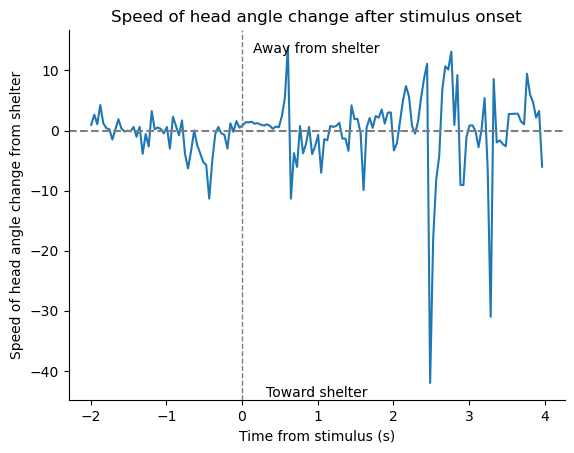

In [28]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [29]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [30]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [31]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9501,9501,9501,29.789492,7.656081,0.017255,30.819791,8.442300,0.991893,31.010591,9.256741,...,0.999670,25.632980,10.232648,0.999981,0.012902,31.185692,0.776506,0.035264,1.169057,0.920491
9502,9502,9502,29.797560,7.550912,0.006027,30.829460,8.422062,0.989825,30.994598,9.192543,...,0.999716,25.643640,10.210280,0.999981,0.048435,31.191575,0.322880,0.011473,1.218738,1.398168
9503,9503,9503,29.805629,7.445742,0.007437,30.844478,8.422062,0.985952,31.023102,9.192543,...,0.999711,25.643640,10.210280,0.999983,0.087245,31.191575,0.000000,0.000000,1.271766,1.366332
9504,9504,9504,29.813698,7.340573,0.023238,30.844478,8.430781,0.995097,31.023102,9.249522,...,0.999801,25.632980,10.178336,0.999989,0.127347,31.164028,0.800352,0.032096,1.330570,1.466359
9505,9505,9505,29.821767,7.235404,0.016141,30.852691,8.430781,0.993056,31.040048,9.249522,...,0.999765,25.614156,10.207578,0.999983,0.167283,31.152312,1.355228,0.054122,1.376171,1.141859
9506,9506,9506,29.829835,7.130234,0.021044,30.844478,8.430781,0.996408,31.020945,9.250304,...,0.999747,25.463987,10.178581,0.999972,0.207270,31.095164,1.677406,0.067074,1.425426,1.231790
9507,9507,9507,29.837904,7.025065,0.048792,30.847337,8.430781,0.997250,31.020945,9.275135,...,0.999729,25.450096,10.178581,0.999973,0.247309,31.062983,0.938358,0.037571,1.465149,0.992101
9508,9508,9508,29.845973,6.919896,0.065885,30.844276,8.430781,0.997875,31.013203,9.276040,...,0.999721,25.423120,10.178581,0.999966,0.294618,31.062886,0.835987,0.039550,1.504071,0.822709
9509,9509,9509,29.854041,6.814726,0.076836,30.847337,8.437235,0.998128,31.013203,9.280486,...,0.999740,25.396149,10.179124,0.999967,0.327514,31.062886,0.000000,0.000000,1.538407,1.043770
9510,9510,9510,29.862110,6.709557,0.019104,30.847337,8.443602,0.996330,31.013203,9.294317,...,0.999727,25.365981,10.178809,0.999966,0.367194,31.062886,0.000000,0.000000,1.570897,0.818811


In [32]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [33]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9501,9501,9501,29.789492,7.656081,0.017255,30.819791,8.442300,0.991893,31.010591,9.256741,...,0.999670,25.632980,10.232648,0.999981,0.012902,31.185692,0.776506,0.035264,1.169057,0.920491
9502,9502,9502,29.797560,7.550912,0.006027,30.829460,8.422062,0.989825,30.994598,9.192543,...,0.999716,25.643640,10.210280,0.999981,0.048435,31.191575,0.322880,0.011473,1.218738,1.398168
9503,9503,9503,29.805629,7.445742,0.007437,30.844478,8.422062,0.985952,31.023102,9.192543,...,0.999711,25.643640,10.210280,0.999983,0.087245,31.191575,0.000000,0.000000,1.271766,1.366332
9504,9504,9504,29.813698,7.340573,0.023238,30.844478,8.430781,0.995097,31.023102,9.249522,...,0.999801,25.632980,10.178336,0.999989,0.127347,31.164028,0.800352,0.032096,1.330570,1.466359
9505,9505,9505,29.821767,7.235404,0.016141,30.852691,8.430781,0.993056,31.040048,9.249522,...,0.999765,25.614156,10.207578,0.999983,0.167283,31.152312,1.355228,0.054122,1.376171,1.141859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9696,9696,9696,-20.945920,12.373479,0.092316,-27.785162,11.690417,0.997733,-27.981840,11.057879,...,0.999987,-21.755771,11.113808,0.999993,7.809101,30.452971,9.527260,0.379747,0.322001,0.389666
9697,9697,9697,-21.001333,12.396676,0.150152,-28.183555,11.707288,0.985699,-28.547813,11.460598,...,0.999990,-22.183620,11.331711,0.999971,7.850227,30.877882,11.655895,0.479360,0.320409,-0.038707
9698,9698,9698,-21.056747,12.419874,0.073328,-28.623231,12.193859,0.971034,-28.953677,11.824018,...,0.999987,-22.376268,11.331711,0.999989,7.889395,31.094555,11.494566,0.450219,0.367358,1.198669
9699,9699,9699,-21.112161,12.443071,0.014843,-29.023313,12.314960,0.989664,-29.285872,11.838689,...,0.999965,-22.656755,11.331711,0.999986,7.929101,31.330608,8.367283,0.332231,0.373028,0.142800


In [34]:

rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)


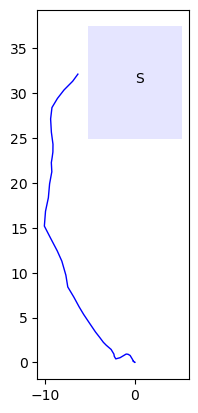

In [35]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


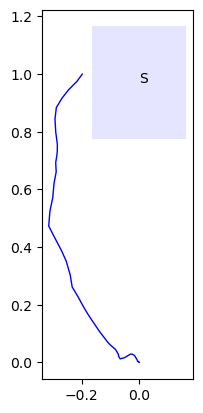

In [36]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
    

